# Project_Ideas
- State Population (year 2010 to 2019): Because it does not contain the state population in year 2020 and 2021, we would use year 2019 state population for 2020 and 2021 state population.
https://www.census.gov/data/datasets/time-series/demo/popest/2010s-state-total.html#par_textimage_500989927
- State id:
https://gist.github.com/dantonnoriega/bf1acd2290e15b91e6710b6fd3be0a53

In [1]:
import numpy as np
import pandas as pd
import altair as alt
from vega_datasets import data
import matplotlib.pyplot as plt

In [2]:
shooting = pd.read_csv('fatal-police-shootings-data (1).csv')
#pd.options.display.max_columns = None
shooting.head()

id                name        date   manner_of_death       armed   age  \
0   3          Tim Elliot  2015-01-02              shot         gun  53.0   
1   4    Lewis Lee Lembke  2015-01-02              shot         gun  47.0   
2   5  John Paul Quintero  2015-01-03  shot and Tasered     unarmed  23.0   
3   8     Matthew Hoffman  2015-01-04              shot  toy weapon  32.0   
4   9   Michael Rodriguez  2015-01-04              shot    nail gun  39.0   

  gender race           city state  signs_of_mental_illness threat_level  \
0      M    A        Shelton    WA                     True       attack   
1      M    W          Aloha    OR                    False       attack   
2      M    H        Wichita    KS                    False        other   
3      M    W  San Francisco    CA                     True       attack   
4      M    H          Evans    CO                    False       attack   

          flee  body_camera  longitude  latitude  is_geocoding_exact  
0  Not fleeing        False   -123.122    47.247                True  
1  Not fleeing        False   -122.892    45.487                True  
2  Not fleeing        False    -97.281    37.695                True  
3  Not fleeing        False   -122.422    37.763                True  
4  Not fleeing        False   -104.692    40.384                True

In [3]:
# categorized armed type
def clean_armed(string):

    if string in ['Airsoft pistol', 'bean-bag gun', 'BB gun', 'air pistol', 'pellet gun',
                 'BB gun and vehicle']:
        return 'toy gun and weapon'

    elif string in ['vehicle and gun', 'gun and car']:
        return 'gun and vehicle'
    
    elif string in ['vehicle and machete', 'car, knife, and mace']:
        return 'sharp object and vehicle'
    
    elif string in ['metal object', 'unknown weapon', 'carjack','claimed to be armed']:
        return 'undetermined'
    
    elif string == 'motorcycle':
        return 'vehicle'
    
    elif string in ['gun and knife', 'hatchet and gun', 'machete and gun', 'gun and sword', 'gun and machete']:
        return 'gun and sharp object'
    
    elif string in ['baseball bat and fireplace poker', 'pole and knife', 'baseball bat and bottle', 'baseball bat and knife']:
        return 'sharp and blunt weapons'
    
    elif string in ['Taser', 'bow and arrow', 'crossbow', 'pepper spray', 'wasp spray']:
        return 'non-firearm ranged weapon'
    
    elif string in ['guns and explosives', 'hand torch', 'fireworks', 'incendiary device', 'grenade']:
        return 'incendiary device'
    
    elif string in ['knife', 'hatchet', 'sword', 'machete', 'box cutter', 'screwdriver', 'lawn mower blade', 'cordless drill', 'metal hand tool', 'sharp object', 'meat cleaver',
                   'straight edge razor', 'ax', 'chain saw', 'scissors', 'spear', 'pitchfork', 'bayonet', 'glass shard', 'metal rake', 'beer bottle', 'pen', 'chainsaw', 'samurai sword',
                   'ice pick', 'bottle', 'nail gun', 'stapler', 'pick-axe','railroad spikes']:
        return 'sharp object'
    
    elif string in ['hammer', 'flagpole', 'metal pole', 'metal pipe', 'blunt object', 'metal stick', "contractor's level", 'brick', 'baseball bat', 'garden tool', 'pole',
                    'flashlight', 'chair', 'rock', 'piece of wood', 'baton', 'crowbar', 'oar', 'pipe', 'wrench', 'walking stick', 'barstool', 'tire iron', 'air conditioner']:
        return 'blunt object'
    
    elif string in ['chain','binoculars','microphone']:
        return 'others'
    else:
        return string
shooting['armed'] = shooting['armed'].apply(clean_armed)
shooting.armed = shooting.armed.fillna('missing')

In [4]:
# data cleaning
armed_type = shooting.groupby('armed').count()['id'].sort_values(ascending = False).head(8).index
shooting.armed = shooting.armed.apply(lambda x: x if x in armed_type else 'others')
shooting.race = shooting.race.replace({'A':'Asian', 'W':'White','H':'Hispanic','B':'black',\
                                      'O':'Other','N':'Native American'}).fillna('unknown')
shooting.head()

id                name        date   manner_of_death         armed   age  \
0   3          Tim Elliot  2015-01-02              shot           gun  53.0   
1   4    Lewis Lee Lembke  2015-01-02              shot           gun  47.0   
2   5  John Paul Quintero  2015-01-03  shot and Tasered       unarmed  23.0   
3   8     Matthew Hoffman  2015-01-04              shot    toy weapon  32.0   
4   9   Michael Rodriguez  2015-01-04              shot  sharp object  39.0   

  gender      race           city state  signs_of_mental_illness threat_level  \
0      M     Asian        Shelton    WA                     True       attack   
1      M     White          Aloha    OR                    False       attack   
2      M  Hispanic        Wichita    KS                    False        other   
3      M     White  San Francisco    CA                     True       attack   
4      M  Hispanic          Evans    CO                    False       attack   

          flee  body_camera  longitude  latitude  is_geocoding_exact  
0  Not fleeing        False   -123.122    47.247                True  
1  Not fleeing        False   -122.892    45.487                True  
2  Not fleeing        False    -97.281    37.695                True  
3  Not fleeing        False   -122.422    37.763                True  
4  Not fleeing        False   -104.692    40.384                True

In [5]:
heat_source = shooting.groupby(['race','armed'],as_index = False)['id'].count()
heat_source = heat_source.rename(columns={'id':'count'})
alt.Chart(heat_source).mark_rect().encode(
    x='race:O',
    y='armed:O',
    color='count:Q',
    tooltip=['race', 'armed','count']
)

alt.Chart(...)

In [6]:
# normalized the armed type based on races
race_count = shooting.groupby('race').count()['id']
normal = heat_source.assign(percentage = heat_source['count']/race_count[heat_source['race']].values)

make = pd.DataFrame({'armed': normal.armed.unique()})
selection = alt.selection_multi(fields=['armed'])
color = alt.condition(selection,
                    alt.Color('armed:N'),#),
                    alt.value('lightgray'))

make_selector = alt.Chart(make).mark_rect().encode(y='armed', 
                                                   color=color).add_selection(selection)

shishi = alt.Chart(normal).mark_bar().encode(
    x='race',
    y= 'percentage',
    color=color,
).transform_filter(selection).properties(
    width=300,
    height=300
).interactive()

make_selector | shishi

alt.HConcatChart(...)

In [7]:
# read the state code csv, and data cleaning
state_id = pd.read_csv('us-state-ansi-fips.csv').rename(columns = {' st':'st',' stusps':'stusps'})
state_id['stusps'] = state_id['stusps'].apply(lambda x: x[1::])
state_id.head()

stname  st stusps
0     Alabama   1     AL
1      Alaska   2     AK
2     Arizona   4     AZ
3    Arkansas   5     AR
4  California   6     CA

In [8]:
shooting_with_state_id = shooting.merge(state_id,left_on = 'state', right_on = 'stusps',how = 'left')
shooting_with_state_id['year'] = shooting_with_state_id['date'].apply(lambda x: x.split('-')[0])#.astype('int')
shooting_with_state_id.head()

id                name        date   manner_of_death         armed   age  \
0   3          Tim Elliot  2015-01-02              shot           gun  53.0   
1   4    Lewis Lee Lembke  2015-01-02              shot           gun  47.0   
2   5  John Paul Quintero  2015-01-03  shot and Tasered       unarmed  23.0   
3   8     Matthew Hoffman  2015-01-04              shot    toy weapon  32.0   
4   9   Michael Rodriguez  2015-01-04              shot  sharp object  39.0   

  gender      race           city state  ...  threat_level         flee  \
0      M     Asian        Shelton    WA  ...        attack  Not fleeing   
1      M     White          Aloha    OR  ...        attack  Not fleeing   
2      M  Hispanic        Wichita    KS  ...         other  Not fleeing   
3      M     White  San Francisco    CA  ...        attack  Not fleeing   
4      M  Hispanic          Evans    CO  ...        attack  Not fleeing   

  body_camera  longitude  latitude  is_geocoding_exact      stname  st  \
0       False   -123.122    47.247                True  Washington  53   
1       False   -122.892    45.487                True      Oregon  41   
2       False    -97.281    37.695                True      Kansas  20   
3       False   -122.422    37.763                True  California   6   
4       False   -104.692    40.384                True    Colorado   8   

   stusps  year  
0      WA  2015  
1      OR  2015  
2      KS  2015  
3      CA  2015  
4      CO  2015  

[5 rows x 21 columns]

In [9]:
population = pd.read_excel('nst-est2019-01.xlsx',header = 3).iloc[5:58,::].drop([56]).reset_index()
population = population.rename(columns = {'Unnamed: 0':'State'}).drop(['index','Census','Estimates Base'], axis=1)
population['State'] = population['State'].apply(lambda x: x[1::] if x != 'Puerto Rico' else x)
population[2020] = population[2019]
population[2021] = population[2019]
population = population.drop(columns=[2010, 2011, 2012, 2013, 2014])
# transform into million
population.iloc[:,1::] =population.iloc[:,1::]/1000000

# add the state id
population = population.merge(state_id, left_on = 'State', right_on = 'stname')
population['State'] = population['st']
population = population.iloc[:,:9]
population.head()

State       2015       2016       2017       2018       2019       2020  \
0      1   4.852347   4.863525   4.874486   4.887681   4.903185   4.903185   
1      2   0.737498   0.741456   0.739700   0.735139   0.731545   0.731545   
2      4   6.829676   6.941072   7.044008   7.158024   7.278717   7.278717   
3      5   2.978048   2.989918   3.001345   3.009733   3.017804   3.017804   
4      6  38.918045  39.167117  39.358497  39.461588  39.512223  39.512223   

        2021      stname  
0   4.903185     Alabama  
1   0.731545      Alaska  
2   7.278717     Arizona  
3   3.017804    Arkansas  
4  39.512223  California

In [10]:
organized = shooting_with_state_id.pivot_table(index='st', columns='year',
                                               values = 'id',aggfunc = 'count').reset_index()
# normalized the data
# Police shootings per million 
for i in range(1,8):
    organized.iloc[:,i] = organized.iloc[:,i]/population.iloc[:,i]
organized['state'] = population['stname']
organized.head()

year  st      2015      2016       2017      2018      2019       2020  \
0      1  3.503459  5.140305   5.128746  2.659748  2.243440   3.263185   
1      2  5.423744  9.440884  10.815195  9.522009  9.568789  12.302729   
2      4  6.149633  7.203498   6.246444  8.661608  4.808540   6.182408   
3      5  1.678952  5.016860   3.998207  6.645108  6.958702   3.645035   
4      6  4.882054  3.523364   4.090603  2.888885  3.416664   3.745676   

year      2021       state  
0     1.631593     Alabama  
1     2.733940      Alaska  
2     1.786029     Arizona  
3     1.988201    Arkansas  
4     0.961728  California

In [11]:
us_states = alt.topo_feature(data.us_10m.url, 'states')

slider = alt.binding_range(min=2015, max=2021, step=1)
select_year = alt.selection_single(name="year", fields=['year'],
                                   bind=slider, init={'year': 2015})
columns = [str(year) for year in range(2015, 2022)]

base = alt.Chart(us_states ,title = "Police Shooting in State Level").mark_geoshape(
    stroke='black',
    strokeWidth=0.05
).project(
    type='albersUsa'
).transform_lookup(
    lookup='id',
    from_=alt.LookupData(organized, 'st', columns + ['st']+['state'])
).transform_fold(
    columns, as_=['year', 'Shootings_per_million']
).transform_calculate(
    year='parseInt(datum.year)',
    Shootings_per_million ='isValid(datum.Shootings_per_million) ? datum.Shootings_per_million : -1'  
).encode(
    color = alt.condition(
        'datum.Shootings_per_million > 0',
        alt.Color('Shootings_per_million:Q', scale=alt.Scale(scheme='blues')),
        alt.value('#dbe9f6')
    ),
    tooltip=['year:O', 'id:Q','state:O',alt.Tooltip('Shootings_per_million:Q',format='.3')]
).add_selection(
    select_year
).properties(
    width=700,
    height=400
).transform_filter(
    select_year
)


base


alt.Chart(...)

In [12]:
us_states = alt.topo_feature(data.us_10m.url, 'states')

slider = alt.binding_range(min=2015, max=2021, step=1)
select_year = alt.selection_single(name="year", fields=['year'],
                                   bind=slider, init={'year': 2015})
columns = [str(year) for year in range(2015, 2022)]

base = alt.Chart(us_states ,title = "Police Shooting in State Level").mark_geoshape(
    stroke='black',
    strokeWidth=0.05
).project(
    type='albersUsa'
).transform_lookup(
    lookup='id',
    from_=alt.LookupData(organized, 'st', columns + ['st']+['state'])
).transform_fold(
    columns, as_=['year', 'Shootings_per_million']
).transform_calculate(
    year='parseInt(datum.year)',
    Shootings_per_million ='isValid(datum.Shootings_per_million) ? datum.Shootings_per_million : -1'  
).encode(
    color = alt.condition(
        'datum.Shootings_per_million > 0',
        alt.Color('Shootings_per_million:Q', 
                  #scale=alt.Scale(scheme='greys')),
                 scale=alt.Scale(scheme='warmgreys')),
        alt.value('#dbe9f6')
    ),
    tooltip=['year:O', 'id:Q','state:O',alt.Tooltip('Shootings_per_million:Q',format='.3')]
).properties(
    width=800,
    height=400
).transform_filter(
    select_year
)

alt.data_transformers.disable_max_rows()
shooting_with_state_id['year'] = shooting_with_state_id['year'].astype(int)
pts = alt.Chart(shooting_with_state_id).mark_point(color = '#D35400', opacity=0.4).encode(
    latitude='latitude',
    longitude='longitude'
).properties(
    width=800,
    height=400
).transform_filter(
    select_year
)

(base+ pts).add_selection(
    select_year
)



alt.LayerChart(...)

In [13]:
select_year = alt.selection_single(name="year", fields=['year'],
                                   bind=slider, init={'year': 2015})


counties = alt.topo_feature(data.us_10m.url, 'states')

base = alt.Chart(counties).mark_geoshape(fill='lightgray',
stroke='white').properties(width=800,height=500).project(
    type='albersUsa')

alt.data_transformers.disable_max_rows()
pts = alt.Chart(shooting_with_state_id).mark_point().encode(
    latitude='latitude',
    longitude='longitude'
).properties(
    width=500,
    height=300
).add_selection(
    select_year
).transform_filter(
    select_year
)

base + pts

alt.LayerChart(...)

In [14]:
counties = alt.topo_feature(data.us_10m.url, 'states')

base = alt.Chart(counties).mark_geoshape(fill='lightgray',
stroke='white').properties(width=800,height=500).project(
    type='albersUsa')

alt.data_transformers.disable_max_rows()
pts = alt.Chart(shooting).mark_point().encode(
    latitude='latitude',
    longitude='longitude'
).properties(
    width=500,
    height=300
)

base + pts

alt.LayerChart(...)

In [15]:
data=pd.read_csv("fatal-police-shootings-data (1).csv")

In [16]:
data.race = data.race.replace({'A':'Asian', 'W':'White','H':'Hispanic','B':'black',\
                                      'O':'Other','N':'Native American'}).fillna('unknown')
data.head()

id                name        date   manner_of_death       armed   age  \
0   3          Tim Elliot  2015-01-02              shot         gun  53.0   
1   4    Lewis Lee Lembke  2015-01-02              shot         gun  47.0   
2   5  John Paul Quintero  2015-01-03  shot and Tasered     unarmed  23.0   
3   8     Matthew Hoffman  2015-01-04              shot  toy weapon  32.0   
4   9   Michael Rodriguez  2015-01-04              shot    nail gun  39.0   

  gender      race           city state  signs_of_mental_illness threat_level  \
0      M     Asian        Shelton    WA                     True       attack   
1      M     White          Aloha    OR                    False       attack   
2      M  Hispanic        Wichita    KS                    False        other   
3      M     White  San Francisco    CA                     True       attack   
4      M  Hispanic          Evans    CO                    False       attack   

          flee  body_camera  longitude  latitude  is_geocoding_exact  
0  Not fleeing        False   -123.122    47.247                True  
1  Not fleeing        False   -122.892    45.487                True  
2  Not fleeing        False    -97.281    37.695                True  
3  Not fleeing        False   -122.422    37.763                True  
4  Not fleeing        False   -104.692    40.384                True

In [17]:
def helper(x):
    return x[:-3]

In [18]:
data["date"]=data["date"].apply(helper)
trend=pd.DataFrame(data.groupby("date")["id"].count())
trend.reset_index(inplace=True)
trend["count"]=trend["id"]
trend=trend.drop("id",axis=1)
trend

date  count
0   2015-01     76
1   2015-02     77
2   2015-03     92
3   2015-04     84
4   2015-05     71
..      ...    ...
71  2020-12     89
72  2021-01     78
73  2021-02     86
74  2021-03     67
75  2021-04     31

[76 rows x 2 columns]

In [19]:
alt.Chart(trend).mark_line().encode(
 x='date',
 y='count',
 tooltip=["date","count"]
).interactive()

alt.Chart(...)

In [20]:
trend_year=trend["date"].apply(lambda x:x[:-3])
trend["date"]=trend_year

In [21]:
trend

date  count
0   2015     76
1   2015     77
2   2015     92
3   2015     84
4   2015     71
..   ...    ...
71  2020     89
72  2021     78
73  2021     86
74  2021     67
75  2021     31

[76 rows x 2 columns]

In [22]:
trend_year=pd.DataFrame(trend.groupby("date")["count"].sum()).reset_index()

In [23]:
alt.Chart(trend_year).mark_line().encode(
 x='date',
 y='count',
 tooltip=["date","count"]
).interactive()

alt.Chart(...)

In [24]:
races=pd.DataFrame(data.groupby(["race","date"])["id"].count())
races["count"]=races["id"]
races=races.reset_index()
races

race     date  id  count
0      Asian  2015-01   2      2
1      Asian  2015-03   2      2
2      Asian  2015-04   2      2
3      Asian  2015-05   1      1
4      Asian  2015-07   1      1
..       ...      ...  ..    ...
436  unknown  2020-12  16     16
437  unknown  2021-01  14     14
438  unknown  2021-02  16     16
439  unknown  2021-03  17     17
440  unknown  2021-04  17     17

[441 rows x 4 columns]

In [25]:
races=races.drop("id",axis=1)
races

race     date  count
0      Asian  2015-01      2
1      Asian  2015-03      2
2      Asian  2015-04      2
3      Asian  2015-05      1
4      Asian  2015-07      1
..       ...      ...    ...
436  unknown  2020-12     16
437  unknown  2021-01     14
438  unknown  2021-02     16
439  unknown  2021-03     17
440  unknown  2021-04     17

[441 rows x 3 columns]

In [26]:
list_races=list(races["race"].value_counts().index)
list_races

['black', 'White', 'Hispanic', 'unknown', 'Asian', 'Native American', 'Other']

In [27]:
race_dropdown = alt.binding_select(options=np.array(list_races))
race_select = alt.selection_single(fields=["race"], bind=race_dropdown, name="select",clear=True)
color = alt.condition(race_select,
                    alt.Color('race:N', legend=None),
                    alt.value('lightgray'))



alt.Chart(races,title="fatal shootings over time for different races").mark_line().encode(
    x='date',
    y='count',
    color=color,
    tooltip=["date","count","race"]
).add_selection(
    race_select).interactive()

alt.Chart(...)

In [28]:
races_1=pd.DataFrame({"race":list(list_races)})

selection = alt.selection_multi(fields=['race'])
color = alt.condition(selection, alt.Color('race:N'), alt.value('lightgray'))

selector1 = alt.Chart(races_1).mark_rect().encode(y='race', color=color).add_selection(selection)
selector2 = alt.Chart(races,title="fatal shootings over time for different races").mark_line().encode(x='date', y="count", color='race').transform_filter(selection)

selector1 | selector2

alt.HConcatChart(...)

In [29]:
def helper2(x):
    if x!="unarmed":
        return "lethal weapon"
    else:
        return "unarmed"

In [30]:
data["armed"]=data["armed"].apply(helper2)

In [31]:
data=data[data["race"]!="Other"]
data=data[data["race"]!="Native American"]

In [32]:
data=data[data["race"]!="unknown"]

In [33]:
new = data.pivot_table(
 values="id",
 index="armed",
 columns="race",
 aggfunc="count"
 )
new=(new).T
new

armed     lethal weapon  unarmed
race                            
Asian                96        8
Hispanic            977       74
White              2715      168
black              1361      135

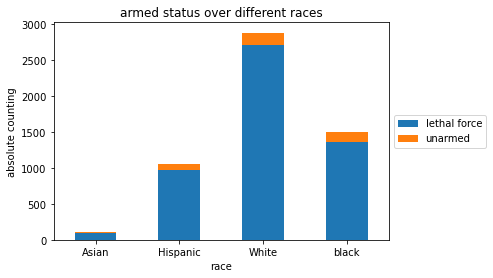

In [34]:
ax = new.plot(kind='bar', stacked=True, rot=0,
 title='armed status over different races')

ax.legend(("lethal force","unarmed"), loc='center left', bbox_to_anchor=(1.0, 0.5))
ax.set_ylabel("absolute counting");

In [35]:
new = data.pivot_table(
 values="id",
 index="armed",
 columns="race",
 aggfunc="count"
 )
new=(new/new.sum()).T
new

armed     lethal weapon   unarmed
race                             
Asian          0.923077  0.076923
Hispanic       0.929591  0.070409
White          0.941727  0.058273
black          0.909759  0.090241

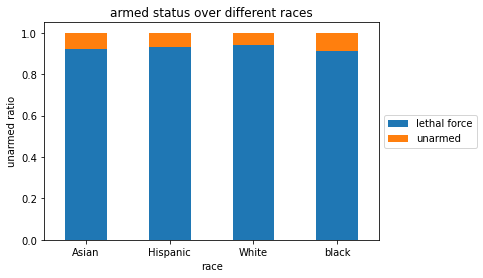

In [36]:
ax = new.plot(kind='bar', stacked=True, rot=0,
 title='armed status over different races')

ax.legend(("lethal force","unarmed"), loc='center left', bbox_to_anchor=(1.0, 0.5))
ax.set_ylabel("unarmed ratio");

In [37]:
data[data["race"]=="White"]["signs_of_mental_illness"].value_counts()

False    2037
True      846
Name: signs_of_mental_illness, dtype: int64

In [38]:
data[data["race"]=="black"]["signs_of_mental_illness"].value_counts()

False    1263
True      233
Name: signs_of_mental_illness, dtype: int64

In [39]:
data[data["race"]=="Asian"]["signs_of_mental_illness"].value_counts()

False    78
True     26
Name: signs_of_mental_illness, dtype: int64

In [40]:
data[data["race"]=="Hispanic"]["signs_of_mental_illness"].value_counts()

False    867
True     184
Name: signs_of_mental_illness, dtype: int64

In [41]:
new = data.pivot_table(
 values="id",
 index="signs_of_mental_illness",
 columns="race",
 aggfunc="count"
 )
new=(new).T
new

signs_of_mental_illness  False  True 
race                                 
Asian                       78     26
Hispanic                   867    184
White                     2037    846
black                     1263    233

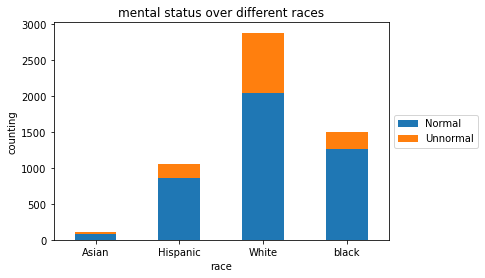

In [42]:
ax = new.plot(kind='bar', stacked=True, rot=0,
 title='mental status over different races')

ax.legend(("Normal","Unnormal"), loc='center left', bbox_to_anchor=(1.0, 0.5))
ax.set_ylabel("counting");

In [43]:
new = data.pivot_table(
 values="id",
 index="signs_of_mental_illness",
 columns="race",
 aggfunc="count"
 )
new=(new/new.sum()).T
new

signs_of_mental_illness     False     True 
race                                       
Asian                    0.750000  0.250000
Hispanic                 0.824929  0.175071
White                    0.706556  0.293444
black                    0.844251  0.155749

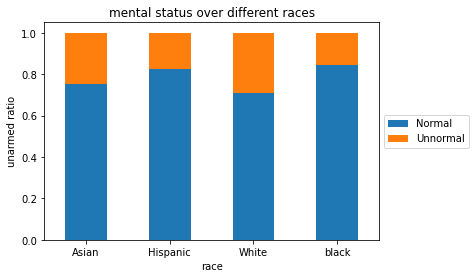

In [44]:
ax = new.plot(kind='bar', stacked=True, rot=0,
 title='mental status over different races')

ax.legend(("Normal","Unnormal"), loc='center left', bbox_to_anchor=(1.0, 0.5))
ax.set_ylabel("unarmed ratio");

In [45]:
data

id                       name     date   manner_of_death  \
0        3                 Tim Elliot  2015-01              shot   
1        4           Lewis Lee Lembke  2015-01              shot   
2        5         John Paul Quintero  2015-01  shot and Tasered   
3        8            Matthew Hoffman  2015-01              shot   
4        9          Michael Rodriguez  2015-01              shot   
...    ...                        ...      ...               ...   
6195  6763            Iremamber Sykap  2021-04              shot   
6199  6765  Devin Wyteagle Kuykendall  2021-04              shot   
6200  6776            James Alexander  2021-04              shot   
6204  6777             DeShund Tanner  2021-04              shot   
6209  6767              Daunte Wright  2021-04              shot   

              armed   age gender      race           city state  \
0     lethal weapon  53.0      M     Asian        Shelton    WA   
1     lethal weapon  47.0      M     White          Aloha    OR   
2           unarmed  23.0      M  Hispanic        Wichita    KS   
3     lethal weapon  32.0      M     White  San Francisco    CA   
4     lethal weapon  39.0      M  Hispanic          Evans    CO   
...             ...   ...    ...       ...            ...   ...   
6195  lethal weapon  16.0      M     Asian       Honolulu    HI   
6199  lethal weapon  26.0      M     White        Redding    CA   
6200  lethal weapon  24.0      M     black   Philadelphia    PA   
6204  lethal weapon  31.0      M     black     Georgetown    KY   
6209  lethal weapon  20.0      M     black       Brooklyn    MN   

      signs_of_mental_illness  threat_level         flee  body_camera  \
0                        True        attack  Not fleeing        False   
1                       False        attack  Not fleeing        False   
2                       False         other  Not fleeing        False   
3                        True        attack  Not fleeing        False   
4                       False        attack  Not fleeing        False   
...                       ...           ...          ...          ...   
6195                    False         other        Other        False   
6199                    False        attack        Other        False   
6200                    False        attack  Not fleeing        False   
6204                    False         other         Foot        False   
6209                    False  undetermined          NaN         True   

      longitude  latitude  is_geocoding_exact  
0      -123.122    47.247                True  
1      -122.892    45.487                True  
2       -97.281    37.695                True  
3      -122.422    37.763                True  
4      -104.692    40.384                True  
...         ...       ...                 ...  
6195   -157.825    21.275                True  
6199   -122.391    40.564                True  
6200    -75.147    40.035                True  
6204    -84.534    38.224                True  
6209    -93.341    45.070                True  

[5534 rows x 17 columns]

In [46]:
new = data.pivot_table(
 values="id",
 index="body_camera",
 columns="race",
 aggfunc="count"
 )
new=(new/new.sum()).T
new

body_camera     False     True 
race                           
Asian        0.817308  0.182692
Hispanic     0.861085  0.138915
White        0.895942  0.104058
black        0.820187  0.179813

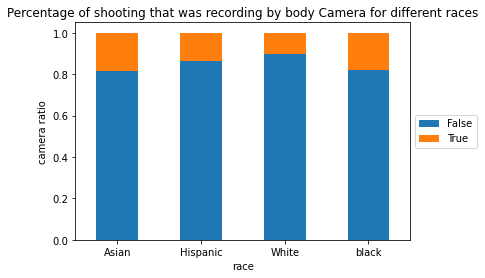

In [47]:
ax = new.plot(kind='bar', stacked=True, rot=0,
 title='Percentage of shooting that was recording by body Camera for different races')

ax.legend(("False","True"), loc='center left', bbox_to_anchor=(1.0, 0.5))
ax.set_ylabel("camera ratio");

In [48]:
# why do the police turn of the camera when they are enforcing the law ?
# Sign of illness ? 
# Threat level ?
# Flee? 

In [49]:
data[data["body_camera"]==True]["signs_of_mental_illness"].value_counts()

False    522
True     212
Name: signs_of_mental_illness, dtype: int64

In [50]:
data[data["body_camera"]==False]["signs_of_mental_illness"].value_counts()

False    3723
True     1077
Name: signs_of_mental_illness, dtype: int64

In [51]:
new = data.pivot_table(
 values="id",
 index="signs_of_mental_illness",
 columns="body_camera",
 aggfunc="count"
 )
new=(new/new.sum()).T
new

signs_of_mental_illness     False     True 
body_camera                                
False                    0.775625  0.224375
True                     0.711172  0.288828

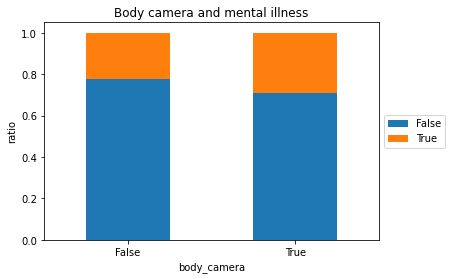

In [52]:
ax = new.plot(kind='bar', stacked=True, rot=0,
 title='Body camera and mental illness')

ax.legend(("False","True"), loc='center left', bbox_to_anchor=(1.0, 0.5))
ax.set_ylabel("ratio");

In [53]:
new = data.pivot_table(
 values="id",
 index="flee",
 columns="body_camera",
 aggfunc="count"
 )
new=(new/new.sum()).T
new

flee              Car      Foot  Not fleeing     Other
body_camera                                           
False        0.178808  0.134437     0.650552  0.036203
True         0.129310  0.178161     0.647989  0.044540

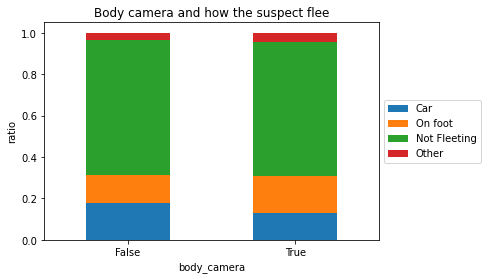

In [54]:
ax = new.plot(kind='bar', stacked=True, rot=0,
 title='Body camera and how the suspect flee')

ax.legend(("Car","On foot","Not Fleeting","Other"), loc='center left', bbox_to_anchor=(1.0, 0.5))
ax.set_ylabel("ratio");

In [55]:
df=pd.DataFrame({
    'Flee Type':["car_cam_on", "car_cam_off","feet_cam_on", "feet_cam_off"] ,
    'percentage': [0.129310/(0.129310+0.178808),0.178808/(0.129310+0.178808),0.178161/(0.134437+0.178161),0.134437/(0.134437+0.178161)]
})

In [56]:
alt.Chart(df).mark_bar().encode(
    x='Flee Type',
    y='percentage'
)

alt.Chart(...)

In [57]:
new = data.pivot_table(
 values="id",
 index="threat_level",
 columns="body_camera",
 aggfunc="count"
 )
new=(new/new.sum()).T
new

threat_level    attack     other  undetermined
body_camera                                   
False         0.656458  0.302083      0.041458
True          0.589918  0.369210      0.040872

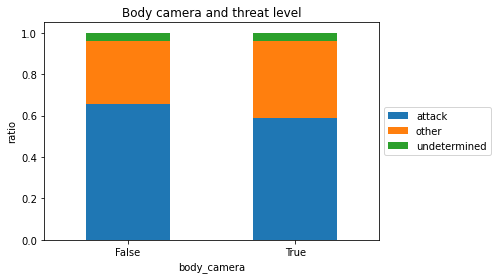

In [58]:
ax = new.plot(kind='bar', stacked=True, rot=0,
 title='Body camera and threat level')

ax.legend(("attack","other","undetermined"), loc='center left', bbox_to_anchor=(1.0, 0.5))
ax.set_ylabel("ratio");

In [59]:
new = data.pivot_table(
 values="id",
 index="threat_level",
 columns="race",
 aggfunc="count"
 )
new=(new/new.sum()).T
new

threat_level    attack     other  undetermined
race                                          
Asian         0.538462  0.442308      0.019231
Hispanic      0.587060  0.364415      0.048525
White         0.661464  0.300382      0.038155
black         0.671123  0.284759      0.044118

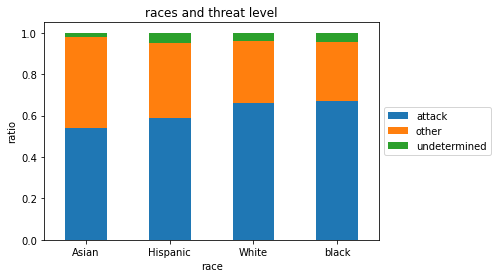

In [60]:
ax = new.plot(kind='bar', stacked=True, rot=0,
 title='races and threat level')

ax.legend(("attack","other","undetermined"), loc='center left', bbox_to_anchor=(1.0, 0.5))
ax.set_ylabel("ratio");